# Problem Statement:
The objective of the dataset is to predict performance of vehicle

## 1.Import Libraries

In [120]:
import pandas as pd
import numpy as np

import seaborn as sns

from matplotlib import pyplot as plt 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

from scipy import stats

## 2.Set Options

In [121]:
pd.options.display.max_rows=None
pd.options.display.max_columns=None

## 3. Read file

In [122]:
df=pd.read_csv("C://Users//Reby Varghese//Vehicle Performance(Mileage)//Dataset//data.csv")
df

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443
5,1,8,429.0,198,4341,10.0,1970,ford galaxie 500,6.377156
6,1,8,454.0,220,4354,9.0,1970,chevrolet impala,5.952012
7,1,8,440.0,215,4312,8.5,1970,plymouth fury iii,5.952012
8,1,8,455.0,225,4425,10.0,1970,pontiac catalina,5.952012
9,1,8,390.0,190,3850,8.5,1970,amc ambassador dpl,6.377156


In [123]:
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


(None, (398, 9))

In [124]:
data=df.copy()
data.shape

(398, 9)

## Data preparation

    1.check and correct the data types
    2.Handling for missing values values.
    3.Data correction
    4.check for Outlier

In [125]:
data.dtypes

origin                   int64
cylinders                int64
displacement           float64
horsepower              object
weight                   int64
acceleration           float64
year                     int64
name                    object
Kilometer_per_liter    float64
dtype: object

In [126]:
data["origin"]=data["origin"].astype("object")
data["cylinders"]=data["cylinders"].astype("object")
# data["hosrsepower"]=data["horsepower"].astype("float")

In [127]:
data.loc[data["horsepower"]=="?"]

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
32,1,4,98.0,?,2046,19.0,1971,ford pinto,10.628593
126,1,6,200.0,?,2875,17.0,1974,ford maverick,8.928018
330,2,4,85.0,?,1835,17.3,1980,renault lecar deluxe,17.388378
336,1,4,140.0,?,2905,14.3,1980,ford mustang cobra,10.033391
354,2,4,100.0,?,2320,15.8,1981,renault 18i,14.667458
374,1,4,151.0,?,3035,20.5,1982,amc concord dl,9.778305


In [128]:
data= data[data["horsepower"] != "?"]
data[data["horsepower"]=="?"].shape

(0, 9)

In [129]:
data.shape

(392, 9)

In [130]:
data["horsepower"]=data["horsepower"].astype(float)

In [131]:
data.dtypes

origin                  object
cylinders               object
displacement           float64
horsepower             float64
weight                   int64
acceleration           float64
year                     int64
name                    object
Kilometer_per_liter    float64
dtype: object

In [132]:
#From problem statement, column name consist of two details i. e manulfacturer and model name

data[["manufacturer" , "model"]]= data["name"].str.split(" ", n=1, expand=True)
data.drop('name', axis=1, inplace=True)

In [133]:
data.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,manufacturer,model
0,1,8,307.0,130.0,3504,12.0,1970,7.652587,chevrolet,chevelle malibu
1,1,8,350.0,165.0,3693,11.5,1970,6.377156,buick,skylark 320
2,1,8,318.0,150.0,3436,11.0,1970,7.652587,plymouth,satellite
3,1,8,304.0,150.0,3433,12.0,1970,6.802299,amc,rebel sst
4,1,8,302.0,140.0,3449,10.5,1970,7.227443,ford,torino


In [134]:
print(sorted(data.manufacturer.unique()))

['amc', 'audi', 'bmw', 'buick', 'cadillac', 'capri', 'chevroelt', 'chevrolet', 'chevy', 'chrysler', 'datsun', 'dodge', 'fiat', 'ford', 'hi', 'honda', 'maxda', 'mazda', 'mercedes', 'mercedes-benz', 'mercury', 'nissan', 'oldsmobile', 'opel', 'peugeot', 'plymouth', 'pontiac', 'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'triumph', 'vokswagen', 'volkswagen', 'volvo', 'vw']


In [135]:
errors = {
    "chevroelt" : "chevrolet",
    'chevy' : "chevrolet",
    "maxda" : "mazda",
    "mercedes-benz" : "mercedes",
    "toyouta" : "toyota",
    "vokswagen" : "volkswagen",
    "vw" : "volkswagen"
}

data["manufacturer"]=data["manufacturer"].map(errors).fillna(data.manufacturer)

In [136]:
print(sorted(data["manufacturer"].unique()))

['amc', 'audi', 'bmw', 'buick', 'cadillac', 'capri', 'chevrolet', 'chrysler', 'datsun', 'dodge', 'fiat', 'ford', 'hi', 'honda', 'mazda', 'mercedes', 'mercury', 'nissan', 'oldsmobile', 'opel', 'peugeot', 'plymouth', 'pontiac', 'renault', 'saab', 'subaru', 'toyota', 'triumph', 'volkswagen', 'volvo']


In [137]:
data.model.unique(),len(data.model.unique())

(array(['chevelle malibu', 'skylark 320', 'satellite', 'rebel sst',
        'torino', 'galaxie 500', 'impala', 'fury iii', 'catalina',
        'ambassador dpl', 'challenger se', "'cuda 340", 'monte carlo',
        'estate wagon (sw)', 'corona mark ii', 'duster', 'hornet',
        'maverick', 'pl510', '1131 deluxe sedan', '504', '100 ls', '99e',
        '2002', 'gremlin', 'f250', 'c20', 'd200', '1200d', 'vega 2300',
        'corona', 'satellite custom', 'torino 500', 'matador',
        'catalina brougham', 'monaco (sw)', 'country squire (sw)',
        'safari (sw)', 'hornet sportabout (sw)', 'vega (sw)', 'firebird',
        'mustang', 'capri 2000', '1900', '304', '124b', 'corolla 1200',
        '1200', 'model 111', 'cricket', 'corona hardtop', 'colt hardtop',
        'type 3', 'vega', 'pinto runabout', 'ambassador sst', 'marquis',
        'lesabre custom', 'delta 88 royale', 'newport royal', 'rx2 coupe',
        'matador (sw)', 'chevelle concours (sw)', 'gran torino (sw)',
        'sate

In [138]:
#some of the model name also feels like wrong
import re
def alphanumeric(x):
    return re.sub('[^A-Za-z0-9]+', '', (str(x)))

data["model"] = data.model.apply(lambda x: alphanumeric(x))

In [139]:
len(data.model.unique())

293

C:\Users\Reby Varghese\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


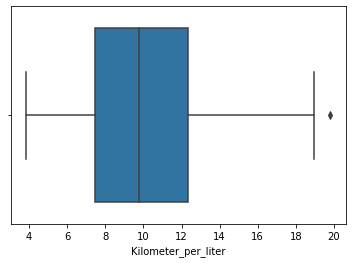

In [140]:
#check for outliers in target variable

sns.boxplot(df['Kilometer_per_liter'])

### Exploratory Data Analysis

    1.Summary Statistics
    2.Distribution of variables
    3.Univariate Analysis
    4.Multivariate Analysis
    5.Covariance
    6.Correlation

In [141]:
#summary statistics for numerical variable

data.describe()

,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,194.411990,104.469388,2977.584184,15.541327,1975.979592,9.967885
std,104.644004,38.491160,849.402560,2.758864,3.683737,3.318250
min,68.000000,46.000000,1613.000000,8.000000,1970.000000,3.826293
25%,105.000000,75.000000,2225.250000,13.775000,1973.000000,7.227443
50%,151.000000,93.500000,2803.500000,15.500000,1976.000000,9.672019
75%,275.750000,126.000000,3614.750000,17.025000,1979.000000,12.329168
max,455.000000,230.000000,5140.000000,24.800000,1982.000000,19.811697


In [142]:
#summary statistics for categorical variables
data.describe(include=object)

,origin,cylinders,manufacturer,model
count,392,392,392,392
unique,3,5,30,293
top,1,4,ford,rabbit
freq,245,199,48,5


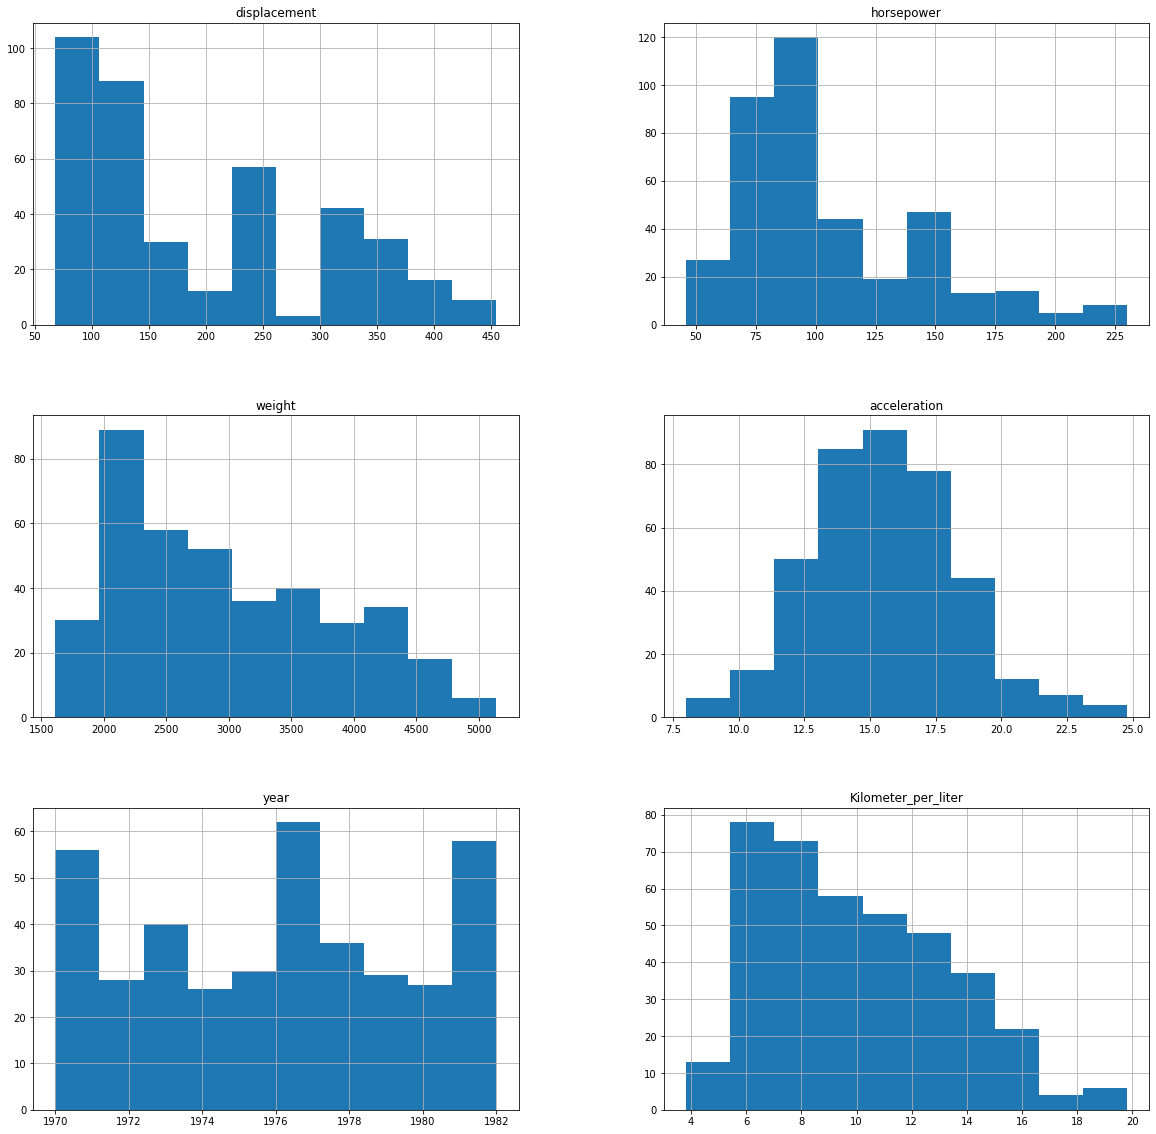

In [143]:
#Distribution of numerical variables
data.hist(figsize=(20,20))
plt.show()

C:\Users\Reby Varghese\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Reby Varghese\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Reby Varghese\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

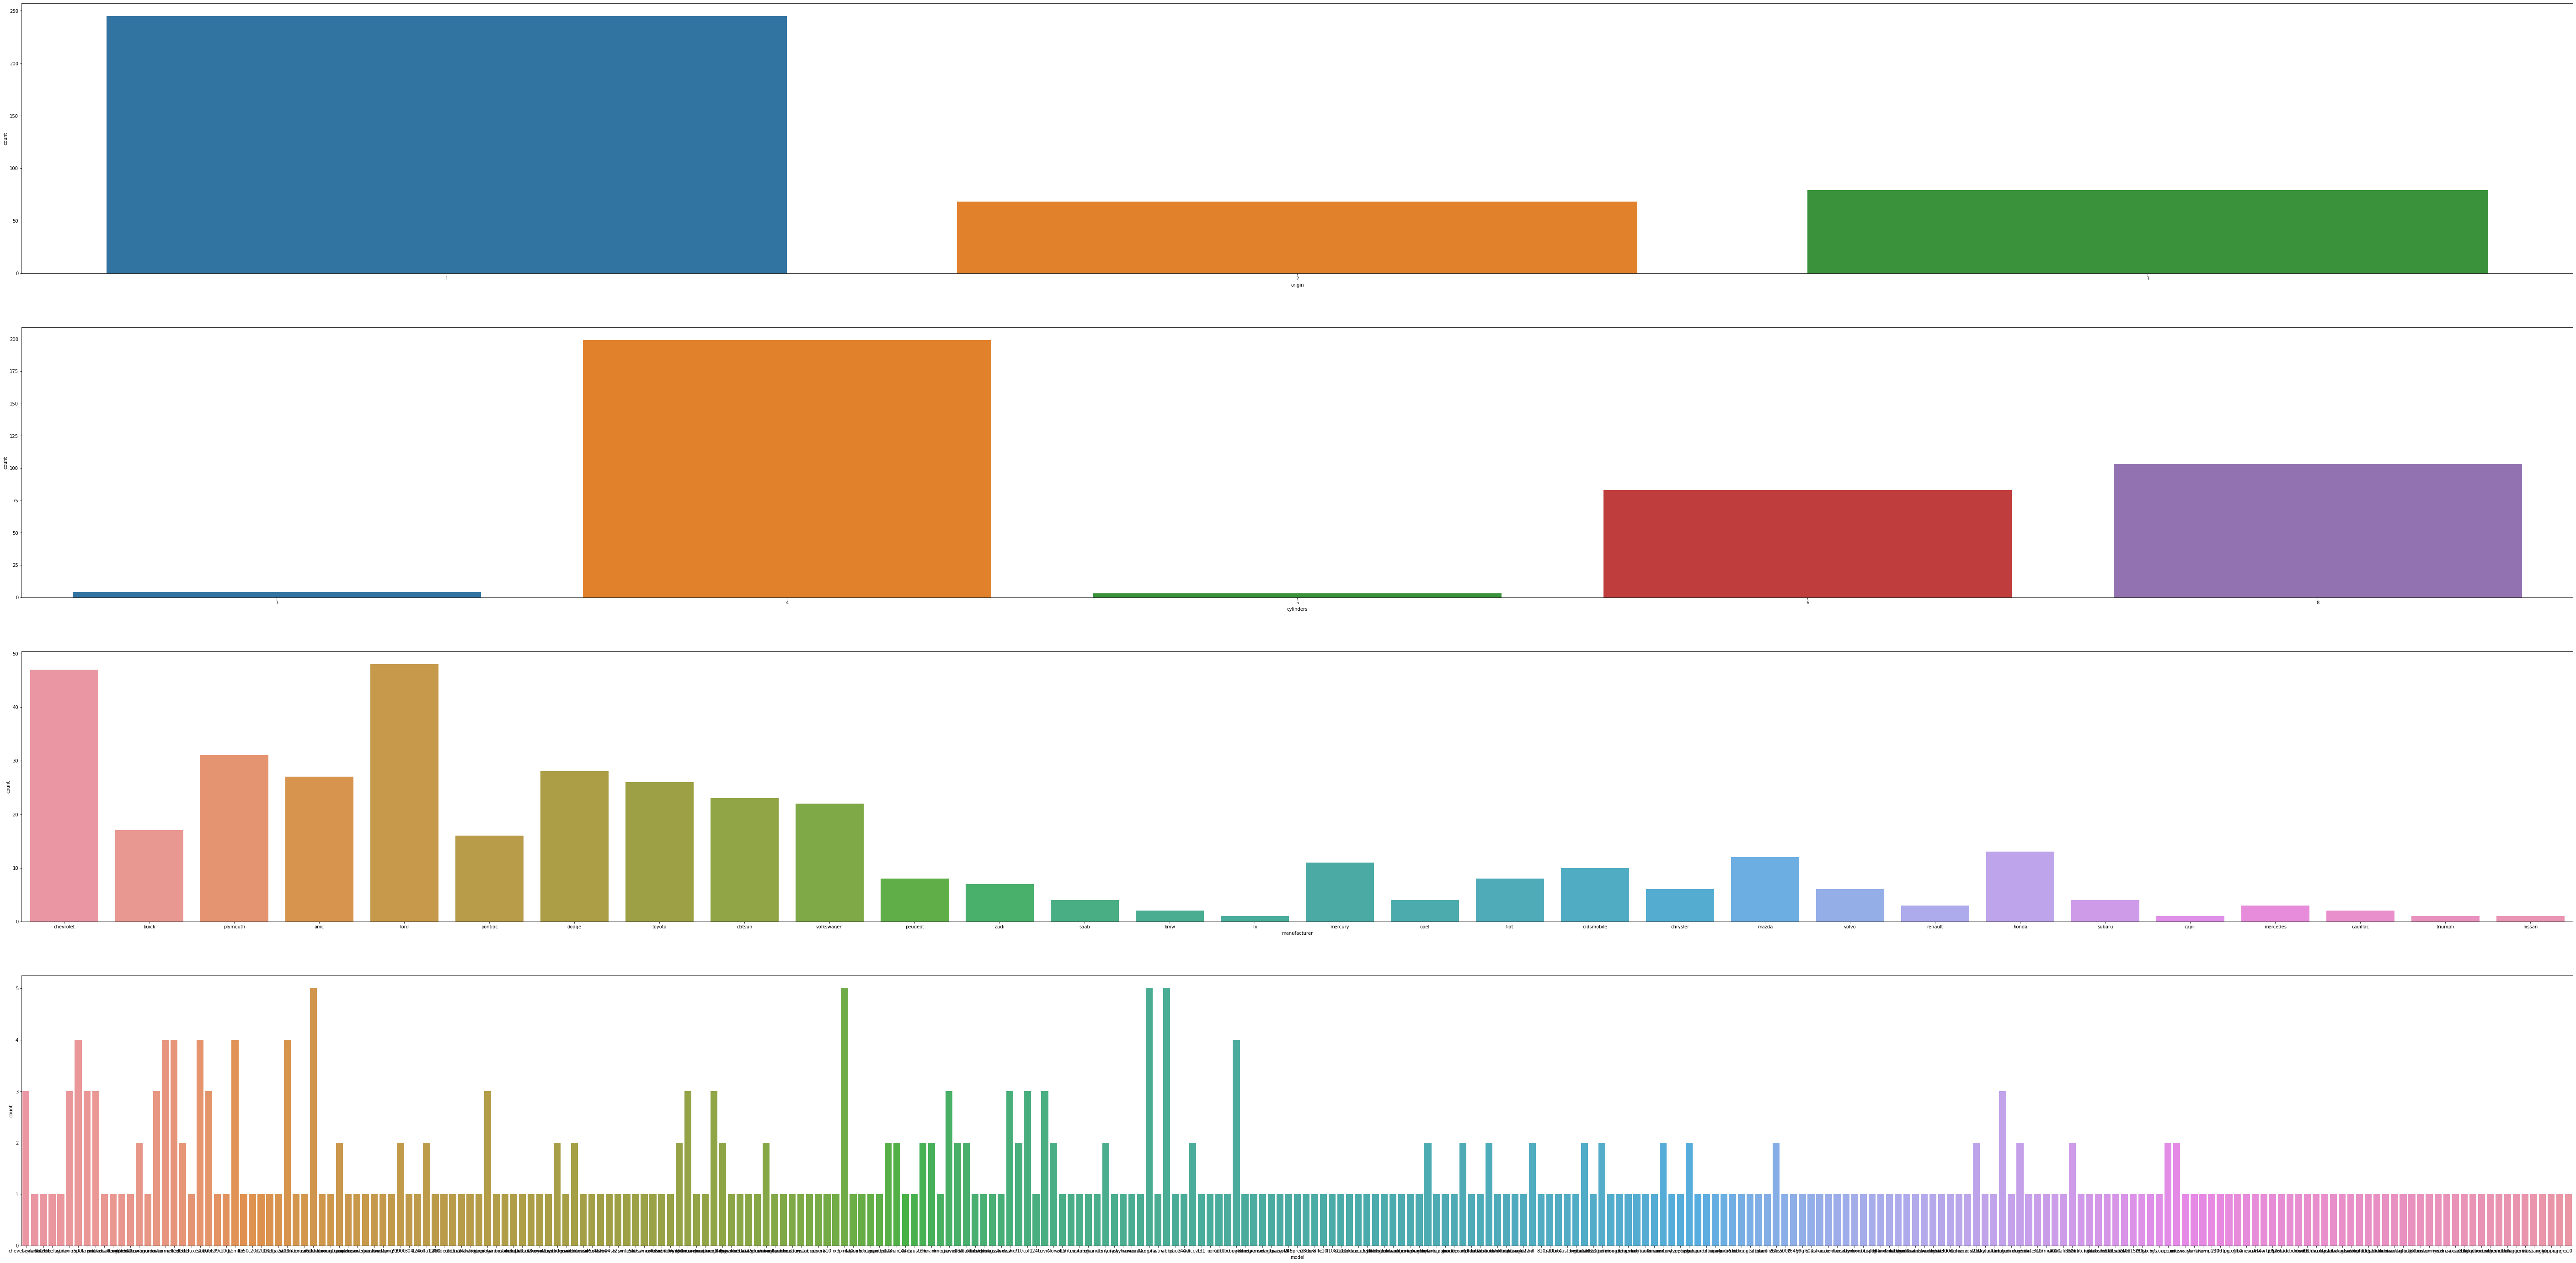

In [144]:
data_categorical= data.select_dtypes(include=object)

fig, ax =plt.subplots(nrows=4, ncols=1, figsize=(100,50))
for index,subplot in zip(data_categorical, ax.flatten()):
    sns.countplot(data[index], ax=subplot)



### Univariate Analysis

#### 1. kilometer_per_liter

In [145]:
data["Kilometer_per_liter"].describe()

count    392.000000
mean       9.967885
std        3.318250
min        3.826293
25%        7.227443
50%        9.672019
75%       12.329168
max       19.811697
Name: Kilometer_per_liter, dtype: float64

C:\Users\Reby Varghese\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


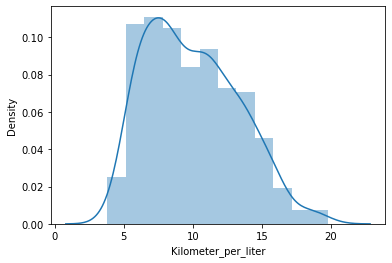

In [146]:
#distributionj plot
sns.distplot(data["Kilometer_per_liter"])

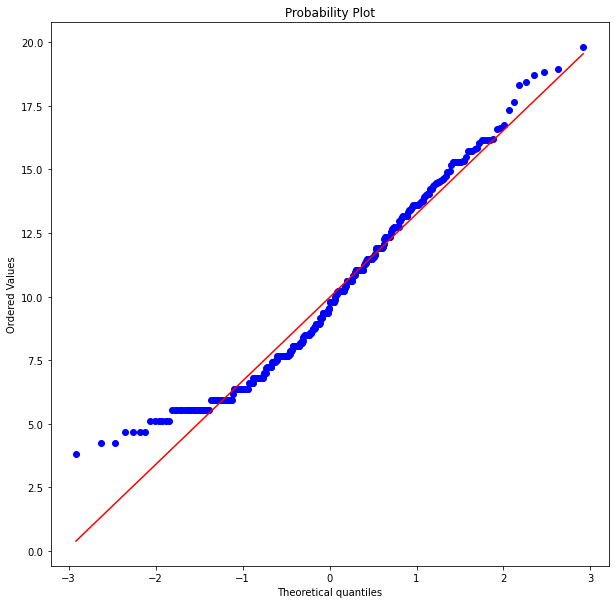

In [147]:
plt.figure(figsize=(10,10))
stats.probplot(data["Kilometer_per_liter"], plot=plt)
plt.show()

In [148]:
print("Skewness", data["Kilometer_per_liter"].skew())
print("Kurtosis", data["Kilometer_per_liter"].kurtosis())

Skewness 0.45709232306040987
Kurtosis -0.5159934946351452


we can see that target variable is not normally distributed

In [149]:
data['log_kilometer_per_liter']=np.log(data["Kilometer_per_liter"])

In [150]:
data.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,manufacturer,model,log_kilometer_per_liter
0,1,8,307.0,130.0,3504,12.0,1970,7.652587,chevrolet,chevellemalibu,2.035044
1,1,8,350.0,165.0,3693,11.5,1970,6.377156,buick,skylark320,1.852722
2,1,8,318.0,150.0,3436,11.0,1970,7.652587,plymouth,satellite,2.035044
3,1,8,304.0,150.0,3433,12.0,1970,6.802299,amc,rebelsst,1.917261
4,1,8,302.0,140.0,3449,10.5,1970,7.227443,ford,torino,1.977885


C:\Users\Reby Varghese\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


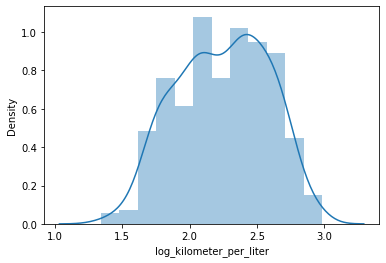

In [151]:
sns.distplot(data["log_kilometer_per_liter"])

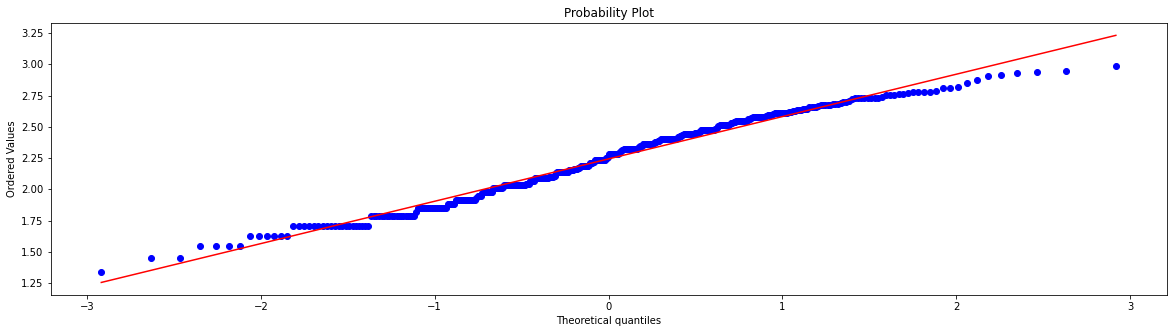

In [152]:
plt.figure(figsize=(20,5))
stats.probplot(data["log_kilometer_per_liter"], plot=plt)
plt.show()

From the above fig we can conclude the log of mileage is normally distributed

#### 2.origin

In [153]:
data["origin"].value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

C:\Users\Reby Varghese\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


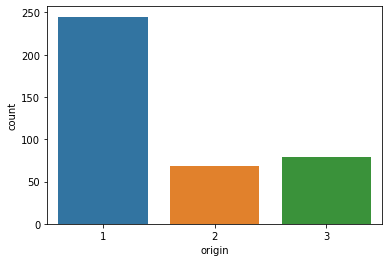

In [154]:
sns.countplot(data["origin"])

#### 3.Displacement

In [155]:
data["displacement"].describe()

count    392.000000
mean     194.411990
std      104.644004
min       68.000000
25%      105.000000
50%      151.000000
75%      275.750000
max      455.000000
Name: displacement, dtype: float64

C:\Users\Reby Varghese\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


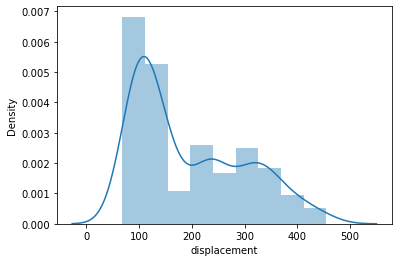

In [156]:
sns.distplot(data["displacement"])

3.Horsepower

In [157]:
data["horsepower"].describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

C:\Users\Reby Varghese\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


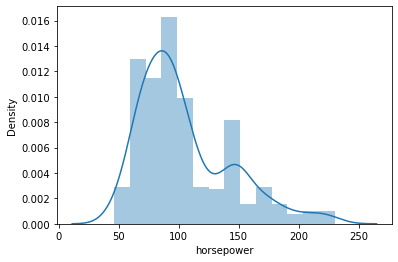

In [158]:
sns.distplot(data["horsepower"])

#### 4. Weight

In [159]:
data["weight"].describe()

count     392.000000
mean     2977.584184
std       849.402560
min      1613.000000
25%      2225.250000
50%      2803.500000
75%      3614.750000
max      5140.000000
Name: weight, dtype: float64

C:\Users\Reby Varghese\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


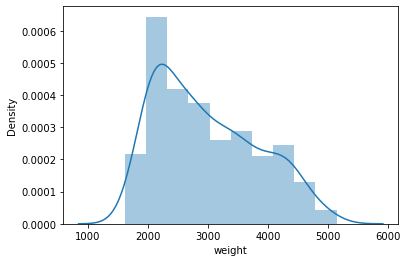

In [160]:
sns.distplot(data["weight"])

#### 5.Accelearation

In [161]:
data["acceleration"].describe()

count    392.000000
mean      15.541327
std        2.758864
min        8.000000
25%       13.775000
50%       15.500000
75%       17.025000
max       24.800000
Name: acceleration, dtype: float64

C:\Users\Reby Varghese\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


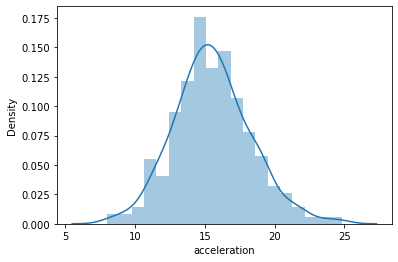

In [162]:
sns.distplot(data["acceleration"])

#### 6.Cylinders

C:\Users\Reby Varghese\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(<matplotlib.axes._subplots.AxesSubplot at 0x2659c327cd0>, 392)

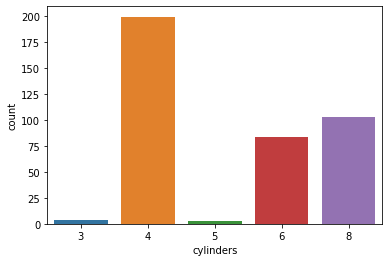

In [163]:
sns.countplot(data["cylinders"]), data["cylinders"].count()

In [164]:
 data["cylinders"].value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

98 percent of values is from 4,6 and 8 cylinders

#### 7.year

C:\Users\Reby Varghese\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


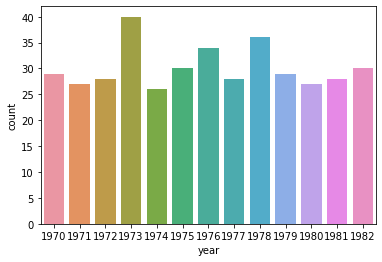

In [165]:
sns.countplot(data["year"])

#### 8. Manufacturer

ford          48
chevrolet     47
plymouth      31
dodge         28
amc           27
toyota        26
datsun        23
volkswagen    22
buick         17
pontiac       16
Name: manufacturer, dtype: int64


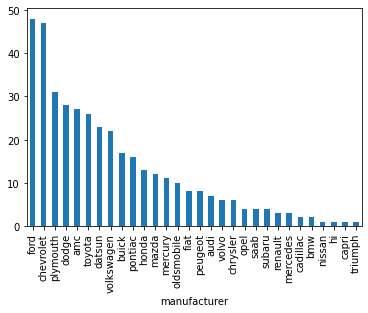

In [166]:
print(data["manufacturer"].value_counts()[0:10])
data.groupby("manufacturer")["manufacturer"].count().sort_values(ascending=False).plot(kind="bar")

#### 8.Model Name

rabbit      5
pinto       5
corolla     5
matador     5
chevette    4
maverick    4
hornet      4
impala      4
corona      4
504         4
Name: model, dtype: int64


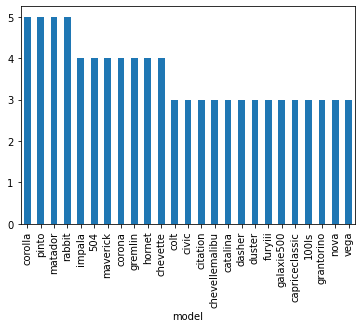

In [167]:
print(data["model"].value_counts()[0:10])
data.groupby("model")["model"].count().sort_values(ascending= False)[0:25].plot(kind="bar")

## Multivariate analysis

#### 1. kilometer_per_liter with origin


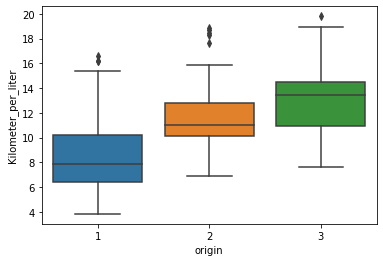

In [168]:
sns.boxplot(x="origin", y= "Kilometer_per_liter", data=data )

we can observe that origin are having impact on kilometer_per_liter

#### 2. kilometer_per_liter with cylinders

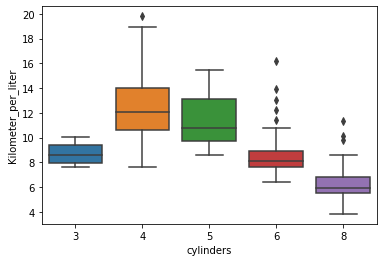

In [169]:
sns.boxplot(x="cylinders", y="Kilometer_per_liter", data=data)

4 cylender vehicles are relatively gives better kilometer_per_liter

#### 3. kilometer_per_liter with displacement

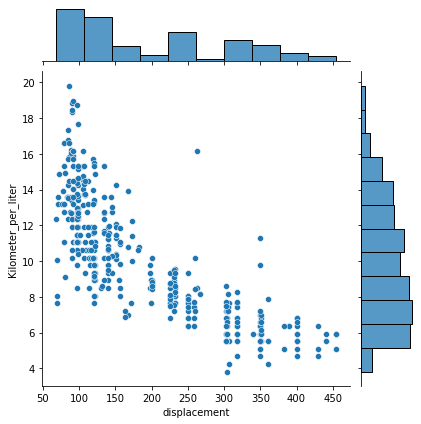

In [170]:
sns.jointplot(data=data, x="displacement", y="Kilometer_per_liter")

weak negative relationship as increase in the displacement leading to decrease in the kilometer_per_liter b

####  4.kilometer_per_liter with horsepower

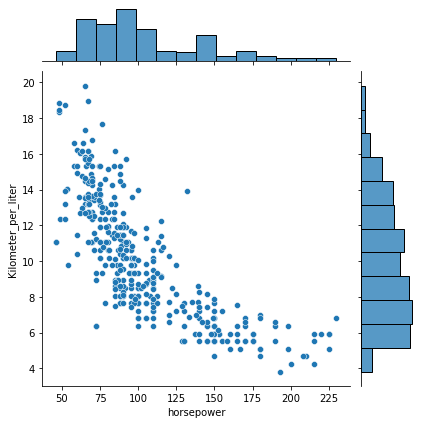

In [171]:
sns.jointplot(data=data, x="horsepower", y="Kilometer_per_liter")

 as increase in the  horsepower leading to decrease in the kilometer_per_liter b

#### 5. kilometer_per_liter with weight

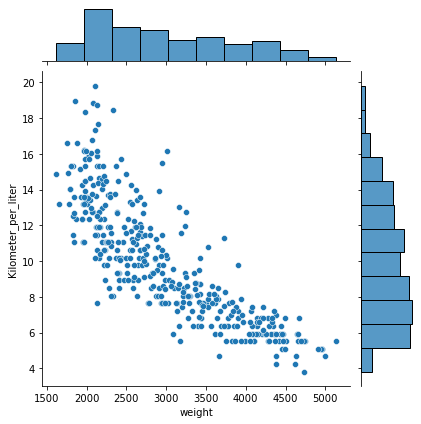

In [172]:
sns.jointplot(data=data, x="weight", y="Kilometer_per_liter")

increase in the weight leading to decrease in the kilometer_per_liter b

#### 6. kilometer with year

In [173]:
data.columns

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'Kilometer_per_liter', 'manufacturer', 'model',
       'log_kilometer_per_liter'],
      dtype='object')

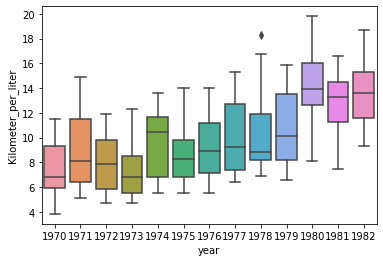

In [174]:
sns.boxplot(data=data, x="year", y="Kilometer_per_liter")

with every new year mileage also increases

#### 7.kilometer per liter with accelaration

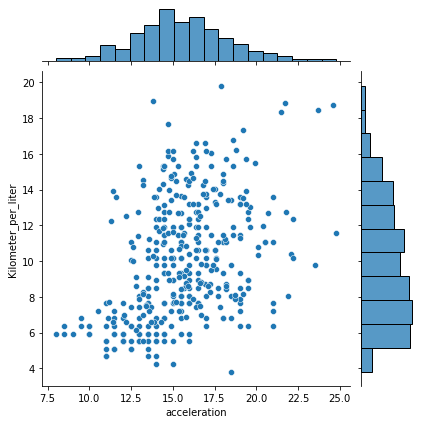

In [175]:
sns.jointplot(data=data, x="acceleration", y="Kilometer_per_liter")

## Covariance

In [176]:
data.cov()

,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,log_kilometer_per_liter
displacement,10950.367554,3614.033744,82929.100139,-156.994435,-142.572133,-279.568213,-30.376921
horsepower,3614.033744,1481.569393,28265.620231,-73.186967,-59.036432,-99.423226,-10.865480
weight,82929.100139,28265.620231,721484.709008,-976.815253,-967.228457,-2345.705196,-252.916327
acceleration,-156.994435,-73.186967,-976.815253,7.611331,2.950462,3.875404,0.419879
year,-142.572133,-59.036432,-967.228457,2.950462,13.569915,7.096276,0.723103
Kilometer_per_liter,-279.568213,-99.423226,-2345.705196,3.875404,7.096276,11.010782,1.110178
log_kilometer_per_liter,-30.376921,-10.865480,-252.916327,0.419879,0.723103,1.110178,0.115626


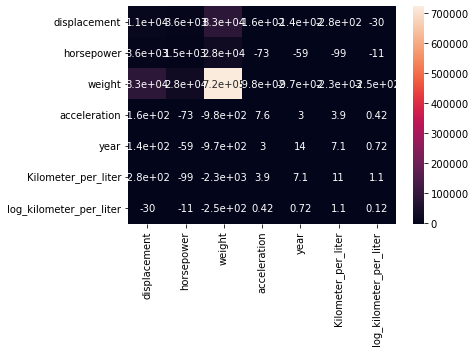

In [177]:
sns.heatmap(data.cov(), annot=True)

## Correlation 

In [178]:
data.corr()

,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter,log_kilometer_per_liter
displacement,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.805127,-0.853691
horsepower,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.778427,-0.830155
weight,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.832244,-0.875658
acceleration,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.423329,0.447574
year,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.580541,0.577275
Kilometer_per_liter,-0.805127,-0.778427,-0.832244,0.423329,0.580541,1.000000,0.983909
log_kilometer_per_liter,-0.853691,-0.830155,-0.875658,0.447574,0.577275,0.983909,1.000000


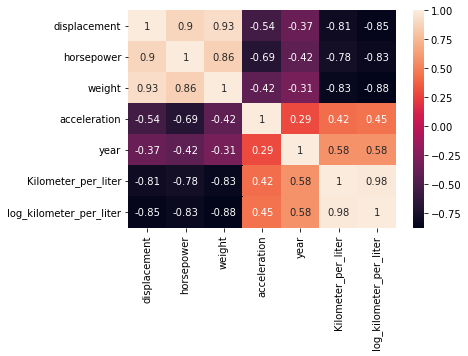

In [179]:
sns.heatmap(data.corr(), annot= True)

In [180]:
#removing columns with strong correaltion, also name
drop_list=["displacement" , "model", "manufacturer", "weight"]
data_cleaned=data.drop(drop_list, axis=1)
data_cleaned.head()

,origin,cylinders,horsepower,acceleration,year,Kilometer_per_liter,log_kilometer_per_liter
0,1,8,130.0,12.0,1970,7.652587,2.035044
1,1,8,165.0,11.5,1970,6.377156,1.852722
2,1,8,150.0,11.0,1970,7.652587,2.035044
3,1,8,150.0,12.0,1970,6.802299,1.917261
4,1,8,140.0,10.5,1970,7.227443,1.977885


In [219]:
data['cylinders'].unique()

array([8, 4, 6, 3, 5], dtype=object)

## Data preprocessing.
    1.Dummy encoding categorical variable
    2.Feature scaling


In [181]:
numerical_data=data_cleaned.select_dtypes(include= np.number)
numerical_data
categorical_data=data_cleaned.select_dtypes(include= "object")

In [182]:
dummy_encoded_variables= pd.get_dummies(categorical_data, drop_first= True)

In [183]:
dummy_variable=pd.concat([numerical_data, dummy_encoded_variables], axis=1)
dummy_variable.head()

,horsepower,acceleration,year,Kilometer_per_liter,log_kilometer_per_liter,origin_2,origin_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8
0,130.0,12.0,1970,7.652587,2.035044,0,0,0,0,0,1
1,165.0,11.5,1970,6.377156,1.852722,0,0,0,0,0,1
2,150.0,11.0,1970,7.652587,2.035044,0,0,0,0,0,1
3,150.0,12.0,1970,6.802299,1.917261,0,0,0,0,0,1
4,140.0,10.5,1970,7.227443,1.977885,0,0,0,0,0,1


#####   Feature Scaling

In [184]:
x=dummy_variable.drop(["Kilometer_per_liter","log_kilometer_per_liter"], axis=1)
x.head()

,horsepower,acceleration,year,origin_2,origin_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8
0,130.0,12.0,1970,0,0,0,0,0,1
1,165.0,11.5,1970,0,0,0,0,0,1
2,150.0,11.0,1970,0,0,0,0,0,1
3,150.0,12.0,1970,0,0,0,0,0,1
4,140.0,10.5,1970,0,0,0,0,0,1


In [185]:
scaler= StandardScaler()
scaler.fit(x)

StandardScaler()

In [186]:
X=scaler.fit_transform(x)
Y=dummy_variable[["Kilometer_per_liter" , "log_kilometer_per_liter"]]

##### Split train and test data

In [187]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.3, random_state=10)

print("shape of X_train : ", X_train.shape)
print("shape of X_test : ", X_test.shape)
print("shape of Y_train : ", Y_train.shape)
print("shape of Y_test : ", Y_test.shape)

shape of X_train :  (274, 9)
shape of X_test :  (118, 9)
shape of Y_train :  (274, 2)
shape of Y_test :  (118, 2)


## Linear Regression
    1.Ordinary Least Sqaure
    2.Stochastic Gradient

In [188]:
#build the model
OLS_model=LinearRegression()
OLS_model.fit(X_train,Y_train['log_kilometer_per_liter'])

LinearRegression()

Text(0, 0.5, 'Predictions')

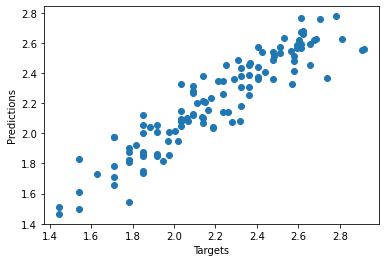

In [189]:
#Predict the values
OLS_prediction=OLS_model.predict(X_test)
plt.scatter(Y_test['log_kilometer_per_liter'], OLS_prediction)
plt.xlabel("Targets")
plt.ylabel("Predictions")

Our model is fit to spme extent

In [190]:
#Compute the accuracy

#r_sqaured
r_squared_OLS=OLS_model.score(X_train, Y_train['log_kilometer_per_liter'])

#adj_rsqaured
n=392 #no of observation
p=9 #no. of independent variable

adj_r_squared_OLS= 1 - (1-r_squared_OLS)*(n-1)/(n-p-1)

#RMSE
from math import sqrt
rmse=sqrt(mean_squared_error(Y_test['log_kilometer_per_liter'], OLS_prediction))

In [191]:
r_squared_OLS,adj_r_squared_OLS,rmse

(0.8590484667691752, 0.8557276191276113, 0.12998463438996813)

In [192]:
#tabulate the results

columns=["Model", "R-sqaured", "Adj-R_Sqaured", "RMSE"]

result=pd.DataFrame()

OLS_metrics= pd.Series({
    "Model" : "OLS_Model",
    "R-Sqaured" : r_squared_OLS,
    "Adj-R_Sqaured" : adj_r_squared_OLS,
    "RMSE" : rmse
})

result=result.append(OLS_metrics, ignore_index=True)

In [193]:
result

,Model,R-Sqaured,Adj-R_Sqaured,RMSE
0,OLS_Model,0.859048,0.855728,0.129985


#### 2.Stochastic Gradient

In [194]:
#build model

SGD_model=SGDRegressor(max_iter=1000)
SGD_model.fit(X_train, Y_train["log_kilometer_per_liter"])

SGDRegressor()

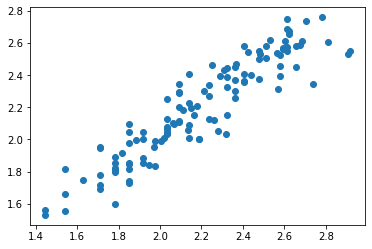

In [195]:
#train the model

SGD_predict=SGD_model.predict(X_test)
plt.scatter(Y_test["log_kilometer_per_liter"], SGD_predict)

In [196]:
SGD_predict

array([2.29969098, 2.5794157 , 2.03307369, 2.73540691, 1.99233947,
       2.01195747, 1.94711983, 1.7190629 , 2.54809526, 2.38867448,
       2.04687716, 2.09467551, 2.52780737, 2.57966079, 1.77806293,
       1.83404954, 2.05238392, 2.45012054, 1.56147539, 1.60042891,
       1.88271148, 2.570557  , 2.04538397, 1.95077445, 1.73187163,
       1.65903283, 2.04687716, 2.61950409, 2.19485171, 2.00317921,
       2.12885319, 2.18453632, 2.55093293, 2.15148857, 2.20887864,
       2.44750549, 2.53087256, 2.0086132 , 1.84436492, 2.49719748,
       2.10587718, 2.12632705, 2.57752641, 2.53042242, 2.40411595,
       1.8883649 , 1.85166689, 2.6085324 , 2.15167383, 2.53468254,
       2.36342996, 1.74943205, 2.06601475, 1.82059961, 1.81341876,
       2.26694269, 2.09127324, 2.35992636, 2.25355662, 2.46755925,
       2.61204821, 2.37200933, 2.10119252, 2.03656177, 2.68633196,
       2.3966104 , 1.8188044 , 2.3468374 , 2.34276779, 1.79899572,
       1.55539163, 2.65474171, 2.3916115 , 2.5597717 , 2.58936

In [197]:
#compute the results

#r-squared
r_squared_SGD=SGD_model.score(X_train, Y_train['log_kilometer_per_liter'])

#adj_r_squared
n=392
p=9

adj_r_squared_SGD=1 - (1-r_squared_SGD)*(n-1)/(n-p-1)

#rmse
rmse_SGD=sqrt(mean_squared_error(Y_test['log_kilometer_per_liter'], SGD_predict))
r_squared_SGD,adj_r_squared_SGD,rmse_SGD

(0.8555006291314329, 0.8520961936921211, 0.13108223144390502)

In [198]:
SGD_metrics= pd.Series({
    "Model" : "SGD_Model",
    "R-Sqaured" : r_squared_SGD,
    "Adj-R_Sqaured" : adj_r_squared_SGD,
    "RMSE" : rmse_SGD
})

result=result.append(SGD_metrics, ignore_index=True)
result

,Model,R-Sqaured,Adj-R_Sqaured,RMSE
0,OLS_Model,0.859048,0.855728,0.129985
1,SGD_Model,0.855501,0.852096,0.131082


From the above table we cab sau OLS model have higher accuracy as compared to SGD_model. 
For smaller data, always prefer OLS

In [199]:
from sklearn.ensemble import RandomForestRegressor
model_3=RandomForestRegressor(random_state=10)
model_3=model_3.fit(X_train,Y_train['Kilometer_per_liter'])
pred_3=model_3.predict(X_test)

In [200]:
pred_3

array([ 8.66357847, 13.13864113,  9.64183414, 15.93693702,  7.54502538,
        7.18662923,  6.83333481,  5.79896017, 17.37179703, 10.36075215,
        8.20102212,  7.02167347, 12.86995031, 12.77726898,  5.66716562,
        6.18584094,  8.12874769, 11.05628726,  5.94776047,  6.01153202,
        6.4354003 , 13.28404028,  8.46035978,  6.67305563,  6.15182945,
        5.42058227,  8.20102212, 14.00848516,  8.58960346,  8.65167445,
        8.34642126,  8.60873493, 13.39925423,  8.30603261,  8.63892013,
       11.5128916 , 14.78904901,  8.13214884,  5.80321161, 11.5838906 ,
        8.31198462,  8.89655722, 14.144106  , 12.58255317, 10.1481803 ,
        6.19306839,  5.79088244, 15.02883006,  8.13640027, 12.45330948,
       10.09928877,  5.12723311,  8.18911809,  5.94350903,  6.92133956,
       11.58814203,  8.10791564, 12.34192183,  8.59725605, 10.89728351,
       16.0904139 , 10.39476365,  7.86770945,  7.86303287, 13.73766862,
       13.63180784,  5.87548604, 10.85221828,  9.79573616,  5.92

In [201]:
Y_test['Kilometer_per_liter']

243     9.140590
371    12.329168
300    10.160935
345    14.922544
265     7.440015
263     7.525044
214     5.526868
44      5.526868
326    18.451237
57     10.203449
128     6.377156
154     6.377156
397    13.179455
388    11.053736
62      5.526868
66      7.227443
101     9.778305
183    10.628593
26      4.251437
6       5.952012
229     6.802299
278    13.392027
48      7.652587
213     5.526868
1       6.377156
67      4.676581
133     6.802299
279    12.541739
283     8.587903
24      8.928018
191     9.353162
257     8.247788
396    11.904024
193    10.203449
259     8.842989
238    14.242314
244    18.323694
165     8.502874
89      6.377156
313    11.904024
176     8.077730
174     7.652587
311    13.647113
359    11.946538
207     8.502874
159     5.952012
115     6.377156
344    16.580605
253     8.715446
240    12.966883
114    11.053736
106     5.101724
100     7.652587
140     5.952012
12      6.377156
389     9.353162
169     8.502874
79     11.053736
111     7.6525

In [202]:
model_3.score(X_train,Y_train['Kilometer_per_liter'])

0.9742633098994162

In [203]:
X_train

array([[ 1.57459447, -1.285258  , -1.35350492, ..., -0.08781846,
        -0.51827446,  1.67505977],
       [-0.87064563,  0.34793254, -0.26626326, ..., -0.08781846,
        -0.51827446, -0.59699362],
       [ 0.74217231,  0.09388068,  0.54916798, ..., -0.08781846,
         1.92947961, -0.59699362],
       ...,
       [-0.24632901, -0.01499869, -1.62531533, ..., -0.08781846,
         1.92947961, -0.59699362],
       [-0.11626304,  0.16646693, -0.53807368, ..., -0.08781846,
         1.92947961, -0.59699362],
       [-0.24632901, -0.48680929,  0.54916798, ..., -0.08781846,
        -0.51827446, -0.59699362]])

In [204]:
r_squared_rf=model_3.score(X_train, Y_train['Kilometer_per_liter'])

#adj_r_squared
n=392
p=9

adj_r_squared_rf=1 - (1-r_squared_rf)*(n-1)/(n-p-1)

#rmse
rmse_rf=sqrt(mean_squared_error(Y_test['Kilometer_per_liter'], pred_3))
r_squared_rf,adj_r_squared_rf,rmse_rf

(0.9742633098994162, 0.9736569480907638, 1.125158987057001)

In [205]:
RF= pd.Series({
    "Model" : "RqandomForest_Model",
    "R-Sqaured" : r_squared_rf,
    "Adj-R_Sqaured" : adj_r_squared_rf,
    "RMSE" : rmse_rf
})

result=result.append(RF, ignore_index=True)
result

,Model,R-Sqaured,Adj-R_Sqaured,RMSE
0,OLS_Model,0.859048,0.855728,0.129985
1,SGD_Model,0.855501,0.852096,0.131082
2,RqandomForest_Model,0.974263,0.973657,1.125159


In [231]:
#as random forest is overfitting and we're getting good numbers in with ols model, we'll select ols model for deployement

x=dummy_variable.drop(["Kilometer_per_liter","log_kilometer_per_liter"], axis=1)
y=dummy_variable[["Kilometer_per_liter","log_kilometer_per_liter"]]


X_train, X_test, Y_train, Y_test=train_test_split(x,y, test_size=0.3, random_state=10)

#creating pipeliness


from sklearn.pipeline import Pipeline
pipe = Pipeline([('Standardscaler', StandardScaler()), ('OLS', LinearRegression())])
pipe.fit(X_train,Y_train['log_kilometer_per_liter'])

Pipeline(steps=[('Standardscaler', StandardScaler()),
                ('OLS', LinearRegression())])

In [232]:
#save the model
import pickle 
pickle.dump(pipe, open('model.pkl', 'wb'))

In [233]:
#load the model

loaded_model = pickle.load(open('model.pkl', 'rb'))
result = loaded_model.score(X_test, Y_test['log_kilometer_per_liter'])
print(result)

0.8530730876378629


In [234]:
loaded_model.predict(X_test)

array([2.34677975, 2.57363525, 2.08187146, 2.75818637, 2.01206021,
       1.94786422, 1.97705449, 1.71022008, 2.55881069, 2.38124513,
       2.05619245, 2.12263335, 2.5114423 , 2.56956015, 1.7805523 ,
       1.85741255, 2.07316871, 2.4505699 , 1.51078652, 1.54761577,
       1.86323466, 2.58875251, 2.0833906 , 1.97333176, 1.73888547,
       1.61106756, 2.05619245, 2.63414584, 2.20567902, 2.03802993,
       2.14174179, 2.20051793, 2.54144186, 2.17989154, 2.2331035 ,
       2.44986476, 2.55266781, 2.070891  , 1.86257363, 2.48450717,
       2.12652466, 2.14777347, 2.59395299, 2.51214745, 2.38266878,
       1.90264718, 1.87426276, 2.62776853, 2.15748415, 2.54841986,
       2.36180513, 1.72974956, 2.09371277, 1.82594184, 1.84709038,
       2.25958479, 2.1031464 , 2.37648337, 2.33109905, 2.46423315,
       2.61915503, 2.38412586, 2.10142707, 2.05103136, 2.67082717,
       2.41487415, 1.83122898, 2.36857184, 2.31509543, 1.81278549,
       1.49785649, 2.66019243, 2.36180081, 2.56838509, 2.61595

In [235]:
predicted=np.exp(loaded_model.predict(X_test))
predicted

array([10.45185792, 13.11340841,  8.019463  , 15.77121392,  7.47870917,
        7.01369185,  7.22144077,  5.53017845, 12.92044181, 10.81836473,
        7.81615265,  8.3531052 , 12.32269026, 13.06007875,  5.93313236,
        6.40713716,  7.94997439, 11.59495285,  4.53029257,  4.70025032,
        6.44454902, 13.31315325,  8.03165496,  7.19460732,  5.69099711,
        5.0081549 ,  7.81615265, 13.93140772,  9.07641252,  7.67547304,
        8.51425475,  9.02968907, 12.69796643,  8.84534682,  9.32877303,
       11.58677956, 12.84131636,  7.9318873 ,  6.44029041, 11.99520724,
        8.38567302,  8.5657652 , 13.38256837, 12.33138266, 10.83377728,
        6.70361664,  6.51601349, 13.84284558,  8.6493498 , 12.78688272,
       10.61008678,  5.63924145,  8.1149884 ,  6.20863983,  6.34134178,
        9.57911104,  8.19190445, 10.76697271, 10.28924371, 11.75446479,
       13.72412222, 10.8495745 ,  8.17783195,  7.77591675, 14.45191848,
       11.18836218,  6.24155268, 10.68212557, 10.12588922,  6.12

In [236]:
np.exp(loaded_model.predict([[130,24,1971,0,0,0,0,0,0]]))

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([5.90638292])

In [237]:
loaded_model.predict([[130,14,1971,0,0,0,0,0,1]])

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1.86766332])

In [239]:
X_test

,horsepower,acceleration,year,origin_2,origin_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8
243,110.0,13.5,1977,0,1,0,0,0,0
371,84.0,16.0,1982,0,0,1,0,0,0
300,90.0,22.2,1979,0,0,0,0,0,1
345,60.0,16.1,1981,0,1,1,0,0,0
265,140.0,13.7,1978,0,0,0,0,0,1
263,165.0,13.4,1978,0,0,0,0,1,0
214,130.0,15.0,1976,0,0,0,0,0,1
44,175.0,12.0,1971,0,0,0,0,0,1
326,48.0,23.7,1980,1,0,1,0,0,0
57,95.0,15.5,1972,0,1,1,0,0,0


In [240]:
np.exp(loaded_model.predict([[130,14,1971,0,0,0,0,0,1]]))

C:\Users\Reby Varghese\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([6.473153])